<a href="https://colab.research.google.com/github/eyesonaplate/ITB-2022/blob/main/w10_class_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ITB 22-2학기 10주차 분류 과제**
*홍보광고학과 1911298 이지우*

### **문제**
2020년도 건강검진정보 샘플(1만건) 데이터를 이용하여 최적의 분류 모델을 만들고 평가 결과 및 도출된 인사이트를 보여주시오.

- 흥미로운 분류 문제 선정: 종속/독립 변수 선택
    - 수치 데이터를 범주형으로 변경 가능 (예. 이진 클래스로 변경: 0.5 이상 Y, 0.5 미만 N)
    - 건강검진 데이터에 다른 외부 데이터를 연결해서 이용도 가능
    - 필요한 경우 데이터 전처리 및 파생변수 생성 
- 최적의 분류 모델 선택 (분류 기법, 파라미터) 및 평가 결과
 - 적절한 평가 방법 1개 선택
 - 분류 모델의 종류는 3개 이하로 선택, 수업시간에 배우지 않은 분류 모델도 사용 가능 
- 분류 모델을 통한 인사이트 도출: 중요 변수 설명 등  
- 코드는 github에 올리고 주소 제출



### 필수 실행 코드



In [ ]:
#한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf 

#해당 코드 실행 후 런타임을 다시 실행하면 한글이 깨지지 않음

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
#폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
#파일 경로 설정
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Step 1. 데이터 탐색**

In [ ]:
#csv파일 불러오기
health = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ITB 2022/health_data.csv", index_col='가입자일련번호')

In [ ]:
display(health.info())
display(health.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   시도코드         10000 non-null  int64  
 2   성별코드         10000 non-null  object 
 3   연령대코드(5세단위)  10000 non-null  int64  
 4   연령대          10000 non-null  object 
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소 

None

,기준년도,시도코드,성별코드,연령대코드(5세단위),연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,M,9,40대,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
2,2020,27,F,13,60대,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
3,2020,11,F,12,50대,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
4,2020,31,M,13,60대,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
5,2020,41,F,12,50대,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [ ]:
health.describe()

,기준년도,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,1.045200,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,0.0,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,0.218545,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,2020.0,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,1.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2020.0,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,1.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,2020.0,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,1.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,2020.0,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,1.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,2020.0,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,3.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


###**Step 2. 분류 문제: 감마지티피*(y-gtp)* 정상 여부**



***감마지티피 수치가 정상인지 비정상인지를 분류해주는 의사결정나무 모델 만들기***

감마지티피(γ-GTP)는 주로 간에 분포하는 효소로 알코올에 민감하게 반응하며 간이나 담도에 질환이 있을 때 비교적 빠르게 이상치를 보이는 특성이 있어 간 질환 검사에 사용된다

- id: 가입자일련번호
- y-gtp : 감마지티피 수치 (타겟 변수)
  - A (abnormal) : 비정상
  - N (normal) : 정상




***종속변수와 독립변수 설정***
- 종속변수: y-gtp / *columns[31]*

- 독립변수: 수축기혈압,이완기혈압,식전혈당,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT / *columns[12:23]*

***감마지티피 수치 판단***


- 남성의 경우 감마지티피 값이 65이상이면 비정상
- 여성의 경우 감마지티피 값이 35이상이면 비정상

### **Step 3. 데이터전처리**

***1) 결측치 제거***

In [ ]:
#결측치가 포함된 행 제거
health_new = health.copy()
health_new = health_new.dropna(axis=0)
print(health_new)

         기준년도  시도코드 성별코드  연령대코드(5세단위)     연령대  신장(5Cm단위)  체중(5Kg 단위)   허리둘레  \
가입자일련번호                                                                       
7        2020    44    M            9     40대        165          80   93.0   
17       2020    30    M           11     50대        160          65   90.0   
22       2020    41    F           11     50대        155          50   65.9   
28       2020    11    M           17  80대 이상        155          60   82.0   
48       2020    26    M           16     70대        165          65   94.0   
...       ...   ...  ...          ...     ...        ...         ...    ...   
9955     2020    30    M            9     40대        180          70   87.5   
9964     2020    41    F           13     60대        160          75  107.4   
9966     2020    45    F           12     50대        155          60   80.0   
9968     2020    11    M           12     50대        170          80   90.0   
9975     2020    41    M           11     50대       

***2) '감마지티피' 수치에 따른 정상/비정상 여부를 판단한 새로운 변수 'y-gtp'만들기***

In [ ]:
#새로운 행 추가
health_new["y-gtp"]=np.NaN

#조건에 맞는 값을 칼럼에 추가
health_new.loc[(health_new['감마지티피']>=65)&(health_new['성별코드']=='M'),'y-gtp']='A'
health_new.loc[(health_new['감마지티피']>=35)&(health_new['성별코드']=='F'),'y-gtp']='A'

#결측치를 다른 값으로 채우기
health_new['y-gtp']=health_new['y-gtp'].fillna("N")

display(health_new)

,기준년도,시도코드,성별코드,연령대코드(5세단위),연령대,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,y-gtp
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
7,2020,44,M,9,40대,165,80,93.0,0.8,0.7,...,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0,12/29/2021,N
17,2020,30,M,11,50대,160,65,90.0,0.6,0.6,...,29.0,54.0,24.0,No,Yes,1,0.0,1.0,12/29/2021,N
22,2020,41,F,11,50대,155,50,65.9,0.7,1.0,...,24.0,14.0,12.0,No,No,1,0.0,0.0,12/29/2021,N
28,2020,11,M,17,80대 이상,155,60,82.0,0.5,0.7,...,33.0,22.0,29.0,No,Yes,1,0.0,0.0,12/29/2021,N
48,2020,26,M,16,70대,165,65,94.0,1.5,0.6,...,28.0,20.0,43.0,No,Yes,1,0.0,0.0,12/29/2021,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9955,2020,30,M,9,40대,180,70,87.5,1.2,0.9,...,22.0,21.0,19.0,No,Yes,1,0.0,1.0,12/29/2021,N
9964,2020,41,F,13,60대,160,75,107.4,0.8,0.8,...,20.0,15.0,14.0,No,Yes,1,1.0,1.0,12/29/2021,N
9966,2020,45,F,12,50대,155,60,80.0,1.5,1.0,...,22.0,9.0,29.0,No,No,1,0.0,0.0,12/29/2021,N


### **Step 4-1. 분류 모델: 의사결정나무모델**

***1) 종속변수와 독립변수 지정하기***

In [ ]:
display(health_new.info())

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#종속변수와 독립변수 지정
X = health_new.iloc[:, 12:24]
y = health_new.iloc[:, 31] 

print(X)
print(y)

***2) 의사결정나무 실행하기***

In [ ]:
#학습데이터와 시험데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
#의사결정나무 사용
tree = DecisionTreeClassifier(max_depth=4,random_state=0)

#의사결정나무에 변수입력 후 학습 시작
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.909
시험용 데이터 정확도: 0.850


***3) 의사결정나무 시각화하기***

N    1070
A     179
Name: y-gtp, dtype: int64


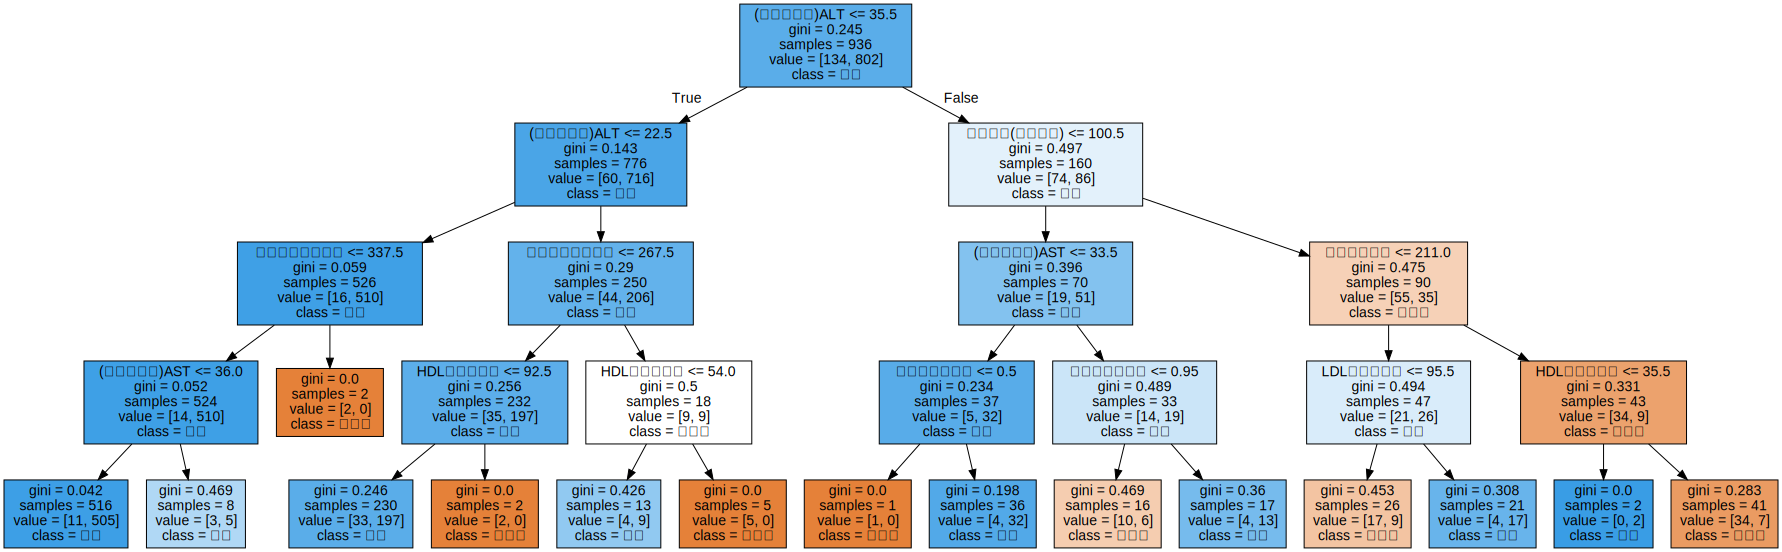

In [ ]:
#의사결정나무 시각화
from sklearn.tree import export_graphviz
import graphviz

#순서 확인
print(health_new['y-gtp'].value_counts())

export_graphviz(tree,out_file="tree.dot",
                class_names=["비정상", "정상"], 
                feature_names=health_new.columns[12:24],
                impurity=True,filled=True)

#classnames는 알파벳 순서 (A,N 순)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

***4) 변수의 중요도 나타내기***

변수의 중요도:
 [0.         0.         0.09909098 0.05791991 0.08557436 0.09807737
 0.05440235 0.         0.         0.04406938 0.05329146 0.50757419]
 


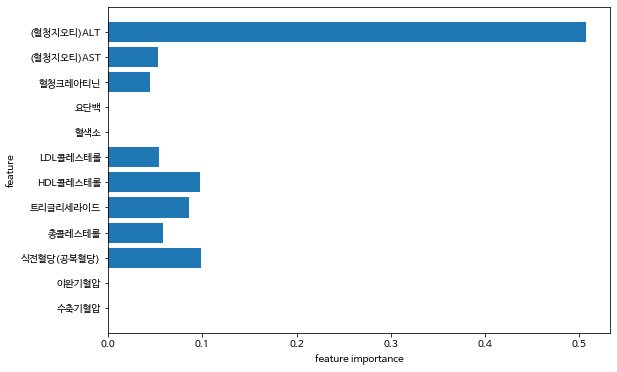

In [ ]:
#변수의 중요도
result = tree.feature_importances_
print("변수의 중요도:\n", result)
print(" ")

#변수의 중요도 시각화 함수
def plot_feature_importances_wisc(model):
    plt.rcParams["figure.figsize"] = (9,6) 
    n_features = len(health_new.columns[12:24])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features),health_new.columns[12:24]) 
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_wisc(tree)

###**Step 4-2. 분류 모델: 그래디언트 부스팅** 

***1) 그래디언트부스팅 실행***

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#default: max_depth= 3, n_estimators=100, learning_rate = 0.1

In [ ]:
#그래디언트부스팅 학습 시작
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.963
시험용 데이터 세트 정확도: 0.840


***2) 변수 중요도 시각화***

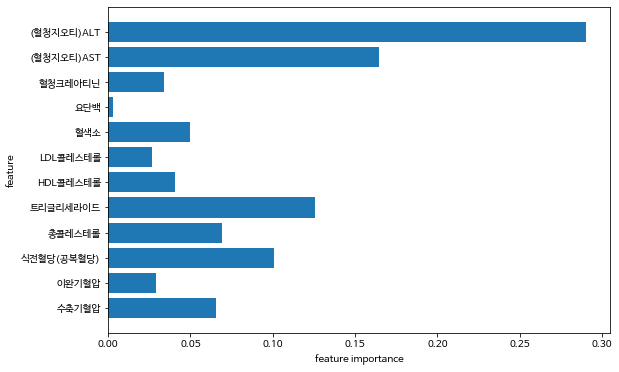

In [ ]:
#변수 중요도 시각화 
plot_feature_importances_wisc(gbrt)

***3-1) 파라미터 변경: max_depth***

max_depth=4일 때 학습데이터 세트 정확도가 시험용데이터 세트 정확도가 가장 높았다

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=4)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.991
시험용 데이터 세트 정확도: 0.850


***3-2) 파라미터 변경: learning_rate***

learning_rate=0.05일 때 학습데이터 세트 정확도는 낮아졌지만 시험용데이터 세트 정확도가 높아졌다

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=4, learning_rate=0.05)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.969
시험용 데이터 세트 정확도: 0.866


### **Step 5. 분류모델 평가: 평가척도 계산**


***1) 정오분류표***

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts())
print('')

#모델불러오기
dt_pred = tree.predict(X_test)
grid_gbrt_pred = gbrt.predict(X_test)

#y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('')

print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, grid_gbrt_pred)))
print(confusion_matrix(y_test, grid_gbrt_pred))

N    268
A     45
Name: y-gtp, dtype: int64

Decision tree 시험용 데이터 세트 정확도:0.850
[[ 15  30]
 [ 17 251]]

Gradient boosting 시험용 데이터 세트 정확도:0.866
[[ 12  33]
 [  9 259]]


***2) 평가척도 계산***


In [ ]:
#의사결정나무 모델 평가척도 계산
print('정밀도 = {:.3f}'.format(251/281))
print('재현율 = {:.3f}'.format(251/268))
print('f1-measure = {:.3f}'.format(2*0.893*0.937/(0.893+ 0.937)))

정밀도 = 0.893
재현율 = 0.937
f1-measure = 0.914


In [ ]:
#그래디언트부스팅 모델 평가척도 계산
print('정밀도 = {:.3f}'.format(259/292))
print('재현율 = {:.3f}'.format(259/268))
print('f1-measure = {:.3f}'.format(2* 0.887*0.966/( 0.887+ 0.966)))

정밀도 = 0.887
재현율 = 0.966
f1-measure = 0.925


***3) classifiaction_report***

In [ ]:
#각 클래스(N,A)가 positive일 때의 정밀도, 재현율, f1-score
from sklearn.metrics import classification_report

#의사결정나무
print("Decision Tree:")
print(classification_report(y_test, dt_pred, target_names=["N", "A"]))
print(" ")

#그래디언트부스팅
print("Gradient Boosting:")
print(classification_report(y_test, grid_gbrt_pred, target_names=["N", "A"]))

Decision Tree:
              precision    recall  f1-score   support

           N       0.47      0.33      0.39        45
           A       0.89      0.94      0.91       268

    accuracy                           0.85       313
   macro avg       0.68      0.63      0.65       313
weighted avg       0.83      0.85      0.84       313

 
Gradient Boosting:
              precision    recall  f1-score   support

           N       0.57      0.27      0.36        45
           A       0.89      0.97      0.93       268

    accuracy                           0.87       313
   macro avg       0.73      0.62      0.64       313
weighted avg       0.84      0.87      0.84       313



### **Step 6. 인사이트**

***분류 모델 평가***

감마지티피 수치가 Positive(정상)인 사례를 Negative(비정상)으로 분류하는 것보다 Negative(비정상)인 사례를 Positive(정상)으로 분류하는 것이 오분류 비용이 크기 때문에 해당 분류에서는 정밀도가 상대적으로 더 중요한 지표로 작용한다. 즉, 정밀도 값이 더 큰 의사결정나무모델(=0.893)이 그래디언트부스팅모델(=0.887)보다 적합하다고 해석할 수 있다.

그러나 'N', 'A' 클래스의 샘플 수가 각각 268개, 45개로 약 6배 정도 차이가 나기 때문에 샘플 개수의 불균형을 고려한 가중평균치 값을 비교해 샘플의 개수가 적은 클래스의 영향력이 감소시키는 것이 필요하다. classifiaction_report에서 의사결정나무와 그래디언트부스팅 모델의 precision의 weighted avg를 비교하면 의사결정나무(=0.83)보다 그래디언트부스팅(=0.84)의 가중평균치가 높은 것을 알 수 있다. 따라서 그래디언트부스팅 모델이 더 적합한 모델이라고 평가할 수 있다.




***변수의 중요도***

의사결정나무와 그래디언트 부스팅 두 모델에서 공통적으로 ALT의 중요도가 다른 변수들에 비해 매우 높게 나타났다. ALT는 전적으로 간에 존재하는 효소로 감마지티피, AST와 함께 간 기능 검사에 사용된다. AST의 경우 간 외에도 심장, 신장, 뇌, 골격근육 등에 존재하기 때문에 ALT에 비해 비교적 중요도가 낮게 측정되었음을 알 수 있다.

그래디언트부스팅모델에서 ALT와 AST 다음으로 높은 중요도를 나타낸 변수는 트리글리세라이드이다. 트리글리세라이드는 중성지방을 뜻하며 트리글리세라이드 수치가 높다는 것은 체내에 포화지방이 많이 쌓인 것을 의미한다. 트리글리세라이드의 특징 중 하나는 알코올의 영향을 많이 받는 것인데 알코올이 감마지티피 수치에도 큰 영향을 주기 때문에 다음과 같은 결과가 나타났다고 볼 수 있다. 